# Probabilistic Data Mining Lab 1
### Mariia Zameshina, Pasha Fedosov, Aidan Mannion, Charles Marshall

In [179]:
%load_ext autoreload
%autoreload 2

from sklearn import mixture
from sklearn.mixture import GaussianMixture as GMM
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import scipy.stats as spstat
import numpy as np
import pandas as pd
import altair as alt
import statistics as stat
import pylab as pl

from scipy.stats import norm
from scipy.special import i0 # import Bessel function of order zero
from scipy.optimize import fsolve
from scipy.special import iv

alt.renderers.enable('jupyterlab')
import os
import util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Preparatory Lab Work and Modeling

Questions 1 and 4 of this section are provided in our lab report. Here, we provide figures for the simulated sample with the asked parameters (questions 2 & 3), and for the unistroke letter A data.

In [180]:
x,y = np.random.multivariate_normal([-3,0], [[5,-2],[-2,1]], size = 150).T
x2, y2 = np.random.multivariate_normal([3,0], [[5,2],[2,2]], 350).T

util.plot(util.df_fromarr(x = list(x) + list(x2),\
                        y = list(y) + list(y2),\
                        label = [1]*150 +[2]*350),"Prep Work Simulated Sample with N = 500")
       

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### 2. Data Analysis: Gaussian Model

### 2.1. Estimated GMM's
We first provide the unlabeled data for A and Amerge, followed by the estimated labels and parameters printed below. 

If the A data does not get well-labeled, please run the next cell multiple times. We provide coments on this behavior in our report. 

In [181]:
GMM = mixture.GaussianMixture(n_components = 2)

#Getting all A letter data amd removing points where x < 0 
A = util.get_data("./Unistroke/",*[f for f in os.listdir("./Unistroke/") if ((f[0] == 'A') and (f[1] != 'm'))])

flag = 0
for item in list(A):
    if item[0] < 0:
        continue
    elif flag == 0:
        new = np.array(item)
        flag = 1
    else:
        new = np.vstack((new, item))
A = new

A_labeled_df = util.df_fromarr(x = [x[0] for x in A],\
                                    y = [x[1] for x in A],\
                                    label= GMM.fit_predict(A))
#Getting all Amerge Data
Amerge = util.get_data("./Unistroke/", "Amerge.txt")
Amerge_labeled_df = util.df_fromarr(x = [x[0] for x in Amerge],\
                                    y = [x[1] for x in Amerge],\
                                    label= GMM.fit_predict(Amerge))

#Plotting unabeled, and predicted labels for both A and Amerge & printing parameters 
util.plot(util.df_fromarr(x = [x[0] for x in A],\
                        y = [x[1] for x in A]), "Unlabeled Letter A Data",\
          util.df_fromarr(x=[x[0] for x in Amerge],\
                          y=[x[1] for x in Amerge]), "Unlabeled Amerge Data")

util.plot(A_labeled_df, "Predicted Labels for A Data",\
        Amerge_labeled_df, "Predicted Labels for Amerge Data")
     
util.mean_variance(A_labeled_df, name = "A Data")
util.mean_variance(Amerge_labeled_df, name = "Amerge Data")

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


Parameters for A Data:
Mean of class 0 = [78.650000000000006, 87.659999999999997], (co)-variance of class 0 = [[353.15, 613.03], [613.03, 1074.95]]
Mean of class 1 = [122.67, 69.260000000000005], (co)-variance of class 1 = [[179.09, -363.43], [-363.43, 781.78]]

Parameters for Amerge Data:
Mean of class 0 = [-0.29999999999999999, -0.71999999999999997], (co)-variance of class 0 = [[0.04, 0.01], [0.01, 0.01]]
Mean of class 1 = [-0.37, 0.91000000000000003], (co)-variance of class 1 = [[0.27, 0.08], [0.08, 0.12]]



### 2.2. Pdf's
Now we provide the 2D log(pdf) with contours using the same data obtained from the previous two figures. Note that the coloring is different since we have switched over to using matplotlib. 

In [182]:
#plotting above data
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
x1,y1,z1 = util.two_dim_contour(GMM.fit(Amerge), Amerge)
CS = plt.contour(x1, y1, z1, norm=LogNorm(vmin=1.0, vmax=1000.0),
                levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(Amerge[:, 0], Amerge[:, 1],.8, c=GMM.fit_predict(Amerge))
#plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')

plt.subplot(1, 2, 2)
x2,y2,z2 = util.two_dim_contour(GMM.fit(A), A)
CS = plt.contour(x2, y2, z2, norm=LogNorm(vmin=1.0, vmax=1000.0),
                levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(A[:, 0], A[:, 1],.8, c=GMM.fit_predict(A))
#plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.tight_layout()

plt.show()


/Users/mariazameshina/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1537: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


IndexError: index 2 is out of bounds for size 2

### 2.3 (a&b) Marginal Histograms (with Amerge only)

In [128]:
#gathering raw and labeled data
x_data = sorted([x[0] for x in Amerge])
y_data = sorted([x[1] for x in Amerge])
x_pdf = spstat.norm.pdf(x_data, stat.mean(x_data), stat.variance(x_data))
y_pdf = spstat.norm.pdf(y_data, stat.mean(y_data), stat.variance(y_data))

x0_data = sorted([x for x in Amerge_labeled_df['x'][Amerge_labeled_df['label']==0]])
x0_pdf = spstat.norm.pdf(x0_data, stat.mean(x0_data), stat.variance(x0_data))
y0_data = sorted([x for x in Amerge_labeled_df['y'][Amerge_labeled_df['label']==0]])
y0_pdf = spstat.norm.pdf(y0_data, stat.mean(y0_data), stat.variance(y0_data))
x1_data = sorted([x for x in Amerge_labeled_df['x'][Amerge_labeled_df['label']==1]])
x1_pdf = spstat.norm.pdf(x1_data, stat.mean(x1_data), stat.variance(x1_data))
y1_data = sorted([x for x in Amerge_labeled_df['y'][Amerge_labeled_df['label']==1]])
y1_pdf = spstat.norm.pdf(y1_data, stat.mean(y1_data), stat.variance(y1_data))

#function to make marginal histograms with gaussian
def plot_hist_gaussian(*args, **kwargs):
    flag = 0
    for i in range(len(args)):
        colors = ['b','r','k','c', 'm']
        if isinstance(args[i],list):
            plt.hist(args[i], 30, density=True,alpha=0.5, label=flag, color = colors[flag]);
        elif isinstance(item,np.ndarray):
            plt.plot(args[i-1], args[i], color= colors[flag])
            flag+=1     
    if 'title' in kwargs: plt.title(kwargs['title']) 
    #plt.legend(loc='upper right', title = 'Label')
    plt.show()




#### We first show marginal histograms in x and y with the estimated mixture of univariate gaussian pdfs.

In [129]:
plot_hist_gaussian(x_data,x_pdf, title = "Amerge x data")
plot_hist_gaussian(y_data,y_pdf, title = "Amerge y data")

TypeError: 'int' object is not iterable

#### And now for each marginal, we separate by cluster and add unicariate Gaussian pdfs.


In [130]:
plot_hist_gaussian(x0_data,x0_pdf,x1_data,x1_pdf, title = "Labeled Amerge x data")
plot_hist_gaussian(y0_data,y0_pdf,y1_data,y1_pdf, title = "Labeled Amerge y data")

TypeError: 'int' object is not iterable

### 2.5. Plotting with P(Zi = 1 | Xi) as colormap DOESNT WORK YET

In [131]:
p_1 = list(Amerge_labeled_df['label']).count(1)/len(Amerge_labeled_df['label'])
nx, binsx, patchesx = plt.hist(x_data, 30, density=True,alpha=0.5);
ny, binsy, patchesy = plt.hist(y_data, 30, density=True,alpha=0.5);

def get_bin(val,bins):
    for i in range(len(bins)):
        if val < bins[i]:
            return i-1

def get_probs():
    probs = []
    for item in Amerge:
        prob = p_1 / ((nx[get_bin(item[0],binsx)]/sum(nx)) * (ny[get_bin(item[1],binsy)]/sum(ny)))
        probs.append(prob)
    return probs
x = get_probs()

# anerge_labeled_probab = util.df_fromarr(x = [x[0] for x in Amerge],\
#                                     y = [x[1] for x in Amerge],\
#                                     label= get_probs())
# alt.Chart(anerge_labeled_probab, height = 250, width = 250).mark_point(filled = True).encode(
#                     alt.X("x:Q"), alt.Y("y:Q"), alt.Color("label:Q")).interactive().display()


/Users/mariazameshina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


### 3. Mandatory Additional Questions

### 3.1. Transforming to angular data

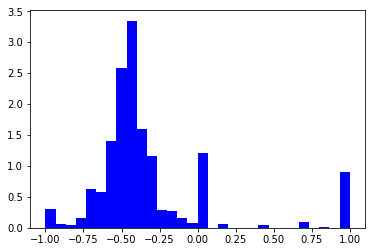

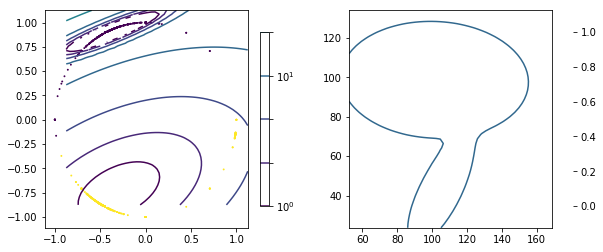

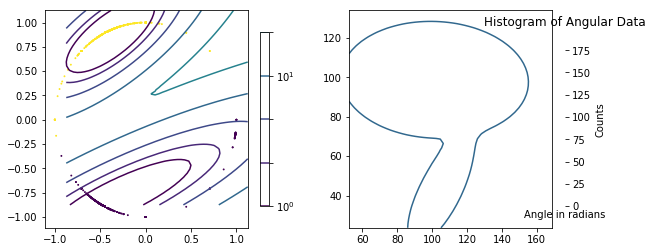

In [132]:
# convert Amerge to angles
A_angles = np.arctan2(Amerge[:,1], Amerge[:,0]) + np.pi

# plot histogram
plt.hist(A_angles, bins = 50)
plt.title('Histogram of Angular Data')
plt.ylabel('Counts')
plt.xlabel('Angle in radians')
plt.show()


### Von Mises Probability Density Functions

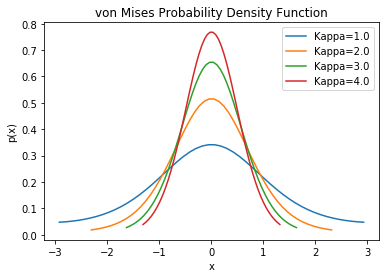

In [133]:
# plot von Mises pdfs
kappa_vec = np.linspace(1, 4, 4)
leg_str = np.array([])
for kappa in kappa_vec :
    vm_x = np.linspace(spstat.vonmises.ppf(0.01, kappa), spstat.vonmises.ppf(0.99, kappa))
    plt.plot(vm_x, spstat.vonmises.pdf(vm_x, kappa))
    leg_str = np.hstack((leg_str, 'Kappa={:.1f}'.format(kappa)))
plt.title('von Mises Probability Density Function')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend(leg_str)
plt.show()


### 4. Optional Additional Questions

### 4.1.b

Imagine, describe and implement a protocol to evaluate the consistency of any arbitrary
estimator of the number of components. Test this protocol on Gaussian mixtures to
check the consistency of that estimator.

/Users/mariazameshina/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/mariazameshina/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/mariazameshina/anaconda3/lib/pyth

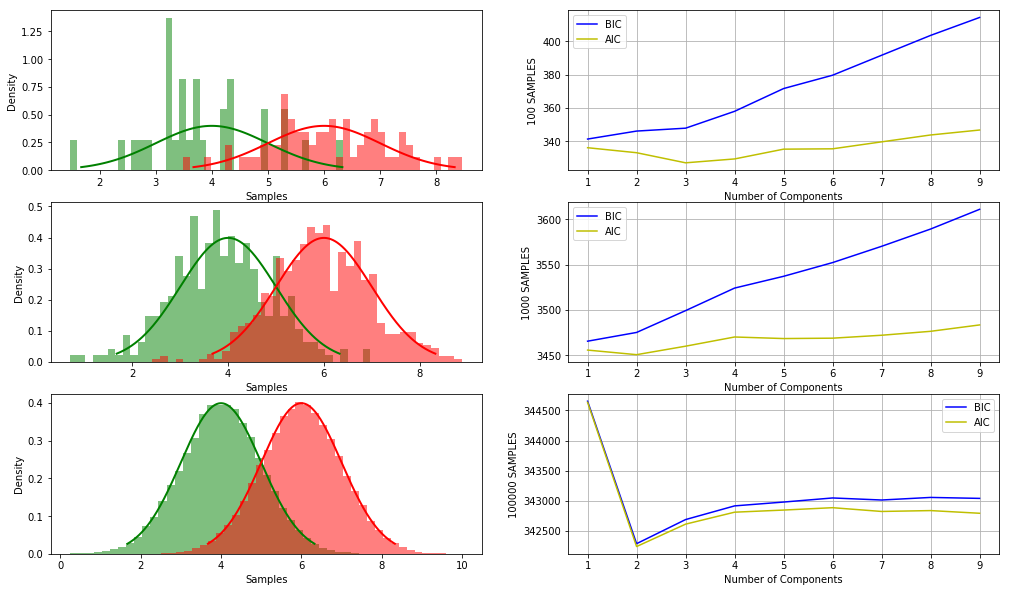

In [134]:
from sklearn.mixture import GaussianMixture as GMM

# Make two components Gaussian mixture with various number of samples in order to show how convergence depends on sample size
components_num = 2
samples_nums = [100, 1000, 100000] 
mean = [4, 6]
std = [1, 1]
pi = [0.3, 0.7]
colors = ['g', 'r']

# Compute BIC/AIC for models with different number of samples (sample size)
# and from plots we can see that the estimated number of components converges better to its true value with growth of sample size
plt.figure(figsize=(17,10))
k = 1

for j, samples_num in zip(range(1,4), samples_nums):
    
    components = np.random.choice([0,1], size=samples_num, replace=True, p=pi)
    
    for i, c, p in zip(range(components_num), colors, pi):
        
        samples = np.random.normal( mean[i], std[i], size=int(p * samples_num) )

        plt.subplot(3, 2, k)                                
        plt.hist(samples, 40, density=True, color=c, histtype='bar', alpha = 0.5)
        x = np.linspace(norm.ppf(0.01, loc=mean[i], scale=std[i]), norm.ppf(0.99, loc=mean[i], scale=std[i]), samples_num)
        y = norm.pdf(x, loc=mean[i], scale=std[i])
        plt.plot(x, y, linewidth=2, color=c)
        plt.xlabel('Samples')
        plt.ylabel('Density')      
    
    samples = np.random.normal(loc=[mean[i] for i in components], scale=[std[i] for i in components],size=samples_num).reshape(-1, 1)
    n_components = np.arange(1, 10)
    models = [GMM(n, covariance_type='full', random_state=42).fit(samples) for n in n_components]
    
    plt.subplot(3, 2, k+1) 
    plt.plot(n_components, [m.bic(samples) for m in models], label='BIC', color='b')
    plt.plot(n_components, [m.aic(samples) for m in models], label='AIC', color='y')
    plt.legend(loc='best')
    plt.xlabel('Number of Components')
    plt.xticks(n_components)
    plt.ylabel('{} SAMPLES'.format(samples_num))
    plt.grid(True)
    
    k += 2                               

plt.show()

### 4.2.a

Write your own sampling function and pdf function of Mixtures of von Mises distributions.

In [135]:
def vonmises_pdf(x, kappa, loc=0, scale=1):
    y = (x - loc) / scale
    return np.exp( kappa * np.cos(y) ) / ( 2 * np.pi * i0(kappa) * scale ) 

In [136]:
def vonmises_samples(mu, kappa, size=1000):
    
   # x = np.linspace(-np.pi, np.pi, num = size) 
   # res = []
   # for i in x:    
   #     res.append(vonmises_pdf(i, kappa, loc=mu, scale=1))
   #  return np.asarray(res) * 2 * np.pi 

   return np.random.vonmises(mu, kappa, size)
    

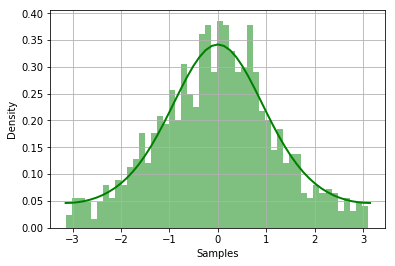

In [137]:
mu, kappa = 0, 1
samples = vonmises_samples(mu, kappa, size=1000) 
plt.hist(samples, 50, density=True, color='g', alpha = 0.5)

x = np.linspace(-np.pi, np.pi, num=51) 
y = vonmises_pdf(x, kappa, loc=mu)
plt.plot(x, y, linewidth=2, color='g')

plt.xlabel('Samples')
plt.ylabel('Density')
plt.grid(True)
plt.show()

### 4.2.b

Use your functions to simulate a 3-components mixture, with sample size of 1,000. Provide the figure showing the data colored by the true labels and the contour plot of the
log(pdf) of the simulated model (you may visualize them on 2D euclidean space).

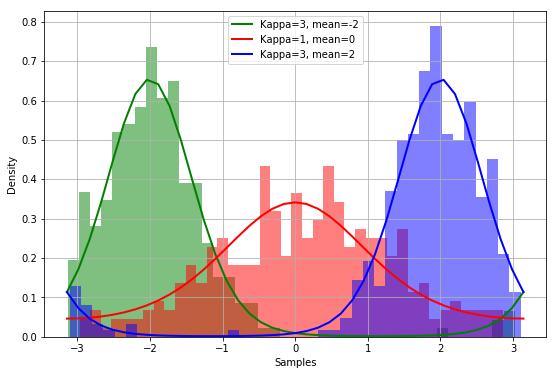

In [138]:
components_num = 3
samples_num = 1000
mean = [-2, 0, 2]
kappa = [3, 1, 3]
pi = [0.3, 0.3, 0.4]
colors = ['g', 'r', 'b']

def plot_model_pdf(components_num, samples_num, mean, kappa, pi, colors = ['g', 'r', 'b']):
    components = np.random.choice([0,1,2], size=samples_num, replace=True, p=pi) 

    leg_str, data = np.array([]), np.array([])
    plt.figure(figsize=(9,6))

    for i, c, p in zip(range(components_num), colors, pi):
    
        samples = vonmises_samples( mean[i], kappa[i], size=int(p * samples_num) )
    
        plt.hist(samples, 40, density=True, color=c, histtype='bar', alpha = 0.5)
        label = 'Kappa={0}, mean={1}'.format(round(kappa[i], 3), round(mean[i], 3)) 
        leg_str = np.hstack((leg_str, label ))
    
        x = np.linspace(-np.pi, np.pi, num=41) 
        y = vonmises_pdf(x, kappa[i], loc=mean[i])
        plt.plot(x, y, linewidth=2, color=c)
    
        data = np.concatenate((data, samples), axis=0) 

    plt.xlabel('Samples')
    plt.ylabel('Density')
    plt.legend(leg_str)
    plt.grid(True)
    plt.show()
    
plot_model_pdf(components_num, samples_num, mean, kappa, pi, colors)

### 4.2.c

Estimate the parameters on the simulated data using your implementation. Comment
the results using parameters, histograms and bivariate plots with clusters (the same plot
as for (b) but using the estimated parameters).

In [176]:
# Compute von Mises density.
def getDensity(data, mean, kappa):
    density_array = []
    for sample in data:
        density_array.append(np.exp(kappa * np.cos(sample - mean)) / (2 * np.pi * iv(0, kappa)))
    return(np.array(density_array))
 
# Compute von Mises distribution for single model.
def getSingleDistribution(data):
    variance = 1 - np.sqrt(np.mean(np.sin(data))**2 + np.mean(np.sin(data))**2)
    mean = np.arctan2(np.mean(np.sin(data)), np.mean(np.sin(data)))
    kappa_ = lambda kappa: 1 - iv(1, kappa) / iv(0, kappa) - variance
    kappa = fsolve(kappa_, 0.0)[0]
    return mean, kappa

def update_t(data, mean, kappa, pi):
    t = pi * getDensity(data, mean, kappa)
    #print("t =", t)
    sum_t = np.sum(t, axis = 1)
    t = (t.T / sum_t).T
    return t

# EM algorithm step.
def EM(data, mean, kappa, pi, t, num_components, current_threshold):
    d_sin = np.sin(data)
    d_cos = np.cos(data)
    mean_sin = np.sin(mean)
    mean_cos = np.cos(mean)
        
    new_pi = np.mean(t, axis=0)
    new_mean = np.arctan2(d_sin.dot(t), d_cos.dot(t))  

    kappa_ = lambda kappa: (d_cos.dot(t * mean_cos) + d_sin.dot(t * mean_sin) - iv(1, kappa) / iv(0, kappa) * np.sum(t, axis=0)).reshape(num_components)
        
    new_kappa = fsolve(kappa_, np.zeros(num_components))
        
    pi_diff = new_pi - pi
    mean_diff = new_mean - mean
    kappa_diff = new_kappa - kappa
        
    current_threshold = np.sum(pi_diff**2 + mean_diff**2 + kappa_diff**2)
    
    pi = new_pi
    mean = new_mean
    kappa = new_kappa
    
    t = update_t(data, mean, kappa, pi)
    return mean, kappa, pi, t, current_threshold 
 
# Compute von Mises distribution for mixture model.
def getMixtureDistribution(data, num_components):
    # Set thresholds.
    global_threshold = 0.001
    current_threshold = 1.0
   
    # Initialize parameters.
    pi = np.random.random(num_components)
    mean = np.random.vonmises(0.0, 0.0, num_components)
    kappa = np.random.random(num_components)

    t = update_t(data, mean, kappa, pi)

    while current_threshold > global_threshold:
        mean, kappa, pi, t, current_threshold = EM(data, mean, kappa, pi, t, num_components, current_threshold)
        
    return pi, mean, kappa

In [177]:
pi_predicted, mean_predicted, kappa_predicted = getMixtureDistribution(data, 3)
print(pi_predicted) 
print(mean_predicted) 
print(kappa_predicted)

pi = [0.3, 0.3, 0.4]
mean = [-2, 0, 2]
kappa = [3, 1, 3]


[ 0.38805693  0.28568409  0.32625898]
[ 1.93009051  0.19897211 -1.91577592]
[ 3.06379122  0.98222024  2.73605725]


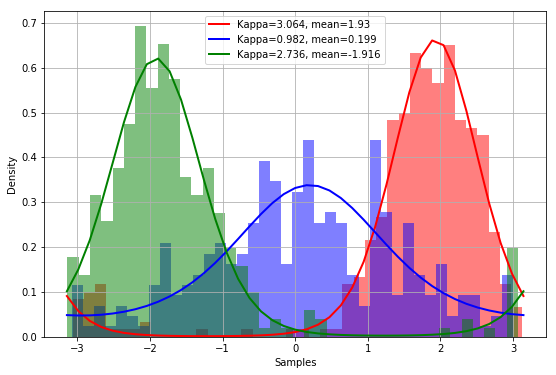

In [178]:
plot_model_pdf(3, 1000, mean_predicted, kappa_predicted, pi_predicted, colors = ['r', 'b', 'g'])